# Libraries to include

In [1]:
%run functions_new.ipynb

# Load the files 

Text(0.5, 1.0, 'Histogram of labels after processing participant: 0')

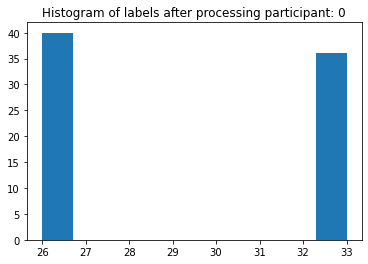

In [2]:

label = []
feature_matrix = []
n_participants = 15


for par_num in range (1,n_participants+1):

    x = fileload ('python_SSA_PSS_FS_P' + str(par_num) + '.mat',1)
    feats = fileload('feat_names.mat',5)
    feature_matrix1 = np.vstack ((x))
    
    # Creating the label matrix
    X = feature_matrix1 [:,0:-1]
    Y = feature_matrix1 [:,-1]

    # Pre post labels
    label1 = Y 

    # New feature matrix
    feature_matrix1 = X
    
    # Combining all of the features
    label.append (label1)
    feature_matrix.append(feature_matrix1)

# Histogram of Y
par_num = 0
plt.figure()
plt.hist(label[par_num])
plt.title ("Histogram of labels after processing participant: %d" %par_num)



(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,  40.,   0.,  36.],
        [  0.,   0.,  51.,  40.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,  35.,  35.,   0.,   0.,   0.],
        [125.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  44.,  55.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  34.,   0.,   0.,  65.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  34.,   0.,  59.,   0.],
        [  0.,   0.,   0.,   0.,   0., 103.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  36.,   0.,  21.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  64.,   0.,   0.,  37.,   0.,   0.],
        [  0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  37.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  46.,  50.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  46.,  36.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,

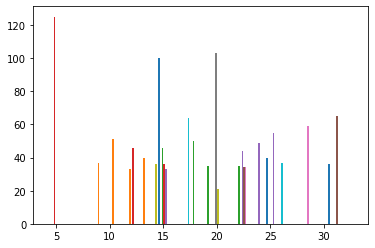

In [5]:
plt.hist (label)

### Plan
- Kmeans cluster the data
- PCA the features
- Classify the dataset


# FT matrix set-up

In [6]:
n_samples_per_par1 = [0]*n_participants

for i in range (0,n_participants):
    print ("FT matrix of P:%d "%(i+1), feature_matrix[i].shape)
    n_samples_per_par1[i] = int (feature_matrix[i].shape[0])
n_samples_per_par = np.cumsum (n_samples_per_par1)
n_samples_per_par = np.insert (n_samples_per_par,0,0)

print ('Array of subject indicies:', n_samples_per_par)

FT matrix of P:1  (76, 21)
FT matrix of P:2  (91, 21)
FT matrix of P:3  (70, 21)
FT matrix of P:4  (125, 21)
FT matrix of P:5  (99, 21)
FT matrix of P:6  (99, 21)
FT matrix of P:7  (93, 21)
FT matrix of P:8  (103, 21)
FT matrix of P:9  (57, 21)
FT matrix of P:10  (101, 21)
FT matrix of P:11  (100, 21)
FT matrix of P:12  (70, 21)
FT matrix of P:13  (96, 21)
FT matrix of P:14  (82, 21)
FT matrix of P:15  (82, 21)
Array of subject indicies: [   0   76  167  237  362  461  560  653  756  813  914 1014 1084 1180
 1262 1344]


# Setting up feature matrix

In [7]:
# Stack the feature matrix to call 
hold1 = np.vstack ((feature_matrix))

n_row = hold1.shape[0]
n_col = hold1.shape[1]

ft_stacked = np.zeros ((n_row,n_col+1))

# Feature matrix in X
ft_stacked [:,0:n_col] = hold1
X = ft_stacked [:,0:-1]

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print ("Labels are:" , kmeans.labels_)
y_pred = kmeans.labels_


Labels are: [1 1 1 ... 2 2 2]


In [42]:
ft_stacked [:,-1] = y_pred
Y = ft_stacked [:,-1]

Text(0, 0.5, 'PSS score')

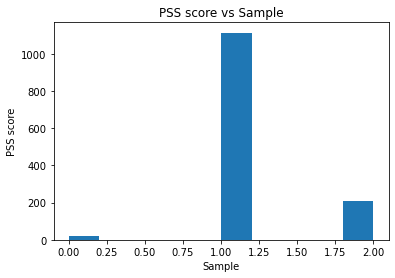

In [43]:
# Plotting actual label vs samples
plt.figure ()
plt.hist (Y)
plt.title ('PSS score vs Sample')
plt.xlabel ('Sample')
plt.ylabel ('PSS score')

# Classification of all

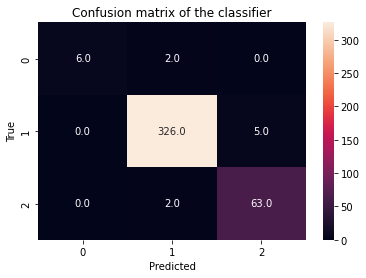

The accuracy of DT is 97.772277%
Participant: 0 
Total samples available: 1344            
Number of training samples: 940 
Number of testing samples: 404 



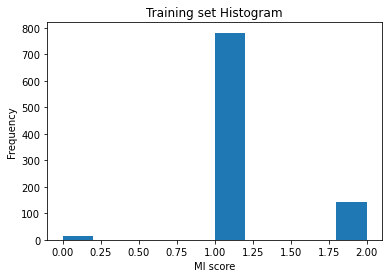

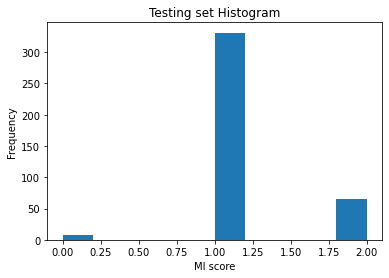

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

DT_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

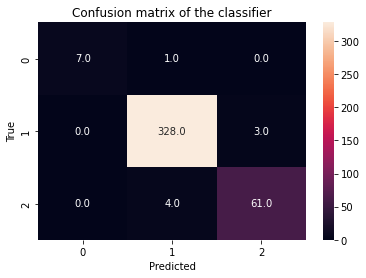

The accuracy of SVM is 98.019802%
Participant: 0 
Total samples available: 1344            
Number of training samples: 940 
Number of testing samples: 404 



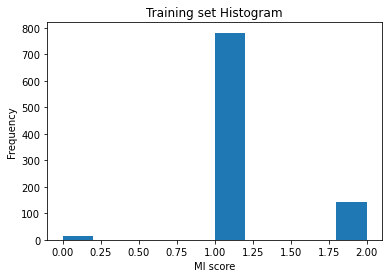

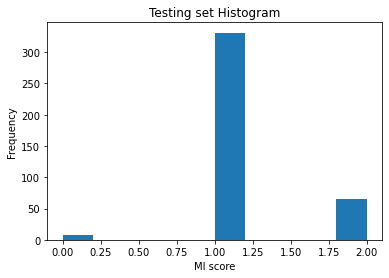

In [45]:
SVM_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

# Cross validation - LOSO

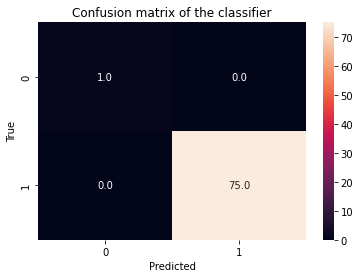

The accuracy of DT is 100.000000%
Participant: 1 
Total samples available: 1344            
Number of training samples: 1267 
Number of testing samples: 76 



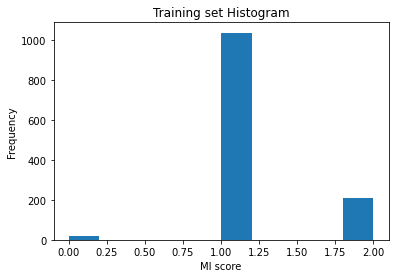

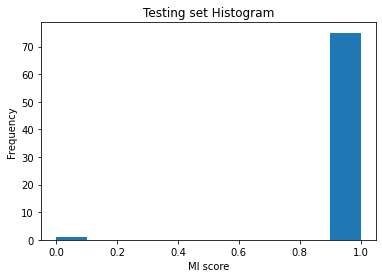

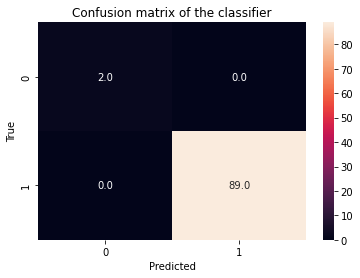

The accuracy of DT is 100.000000%
Participant: 2 
Total samples available: 1344            
Number of training samples: 1252 
Number of testing samples: 91 



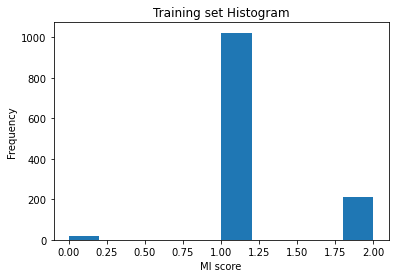

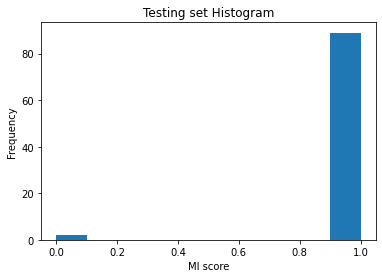

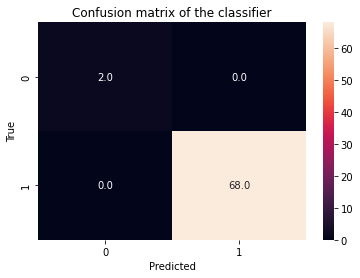

The accuracy of DT is 100.000000%
Participant: 3 
Total samples available: 1344            
Number of training samples: 1273 
Number of testing samples: 70 



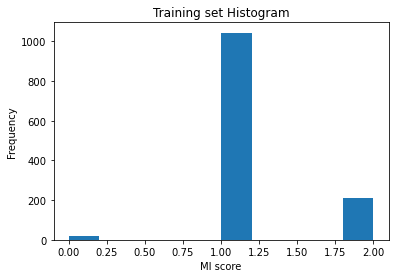

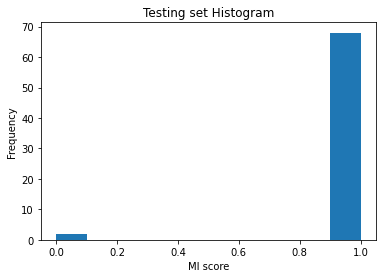

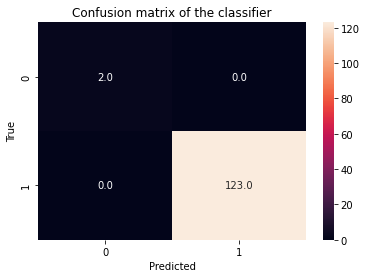

The accuracy of DT is 100.000000%
Participant: 4 
Total samples available: 1344            
Number of training samples: 1218 
Number of testing samples: 125 



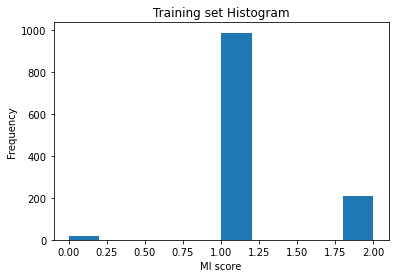

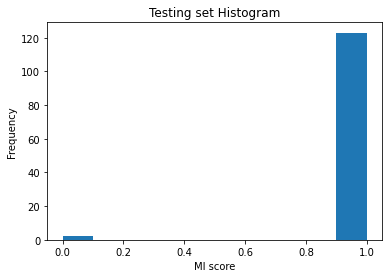

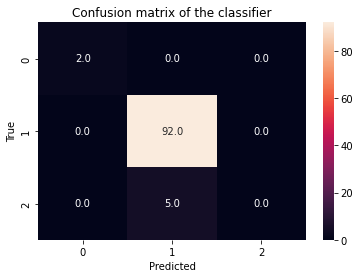

The accuracy of DT is 94.949495%
Participant: 5 
Total samples available: 1344            
Number of training samples: 1244 
Number of testing samples: 99 



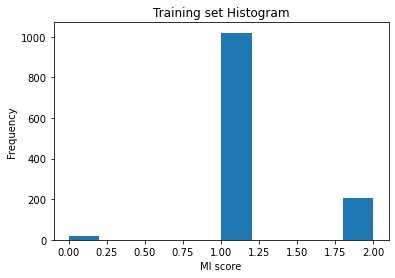

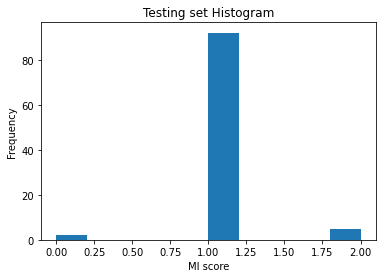

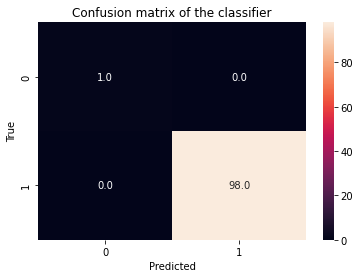

The accuracy of DT is 100.000000%
Participant: 6 
Total samples available: 1344            
Number of training samples: 1244 
Number of testing samples: 99 



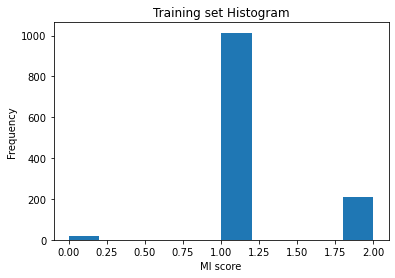

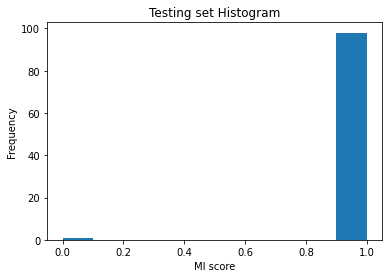

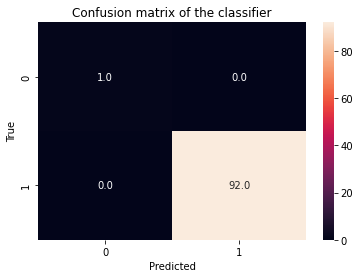

The accuracy of DT is 100.000000%
Participant: 7 
Total samples available: 1344            
Number of training samples: 1250 
Number of testing samples: 93 



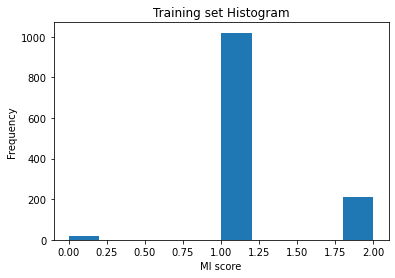

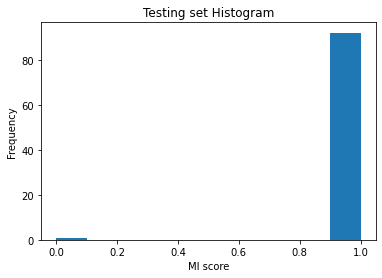

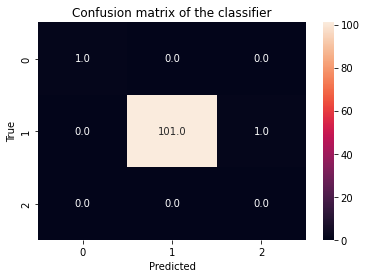

The accuracy of DT is 99.029126%
Participant: 8 
Total samples available: 1344            
Number of training samples: 1240 
Number of testing samples: 103 



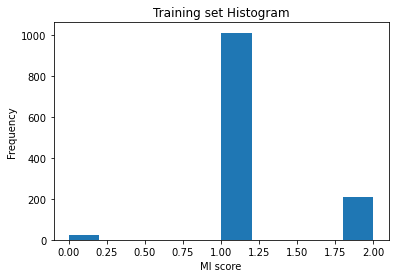

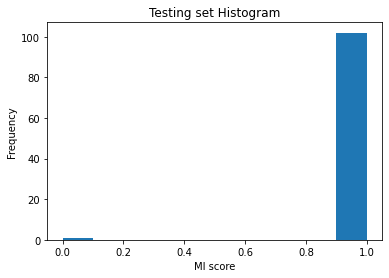

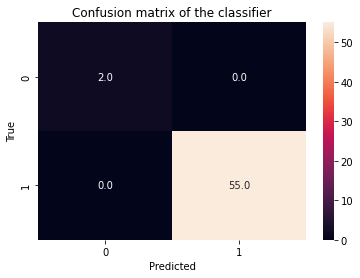

The accuracy of DT is 100.000000%
Participant: 9 
Total samples available: 1344            
Number of training samples: 1286 
Number of testing samples: 57 



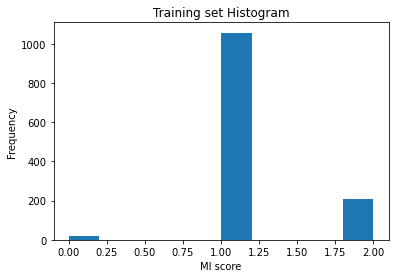

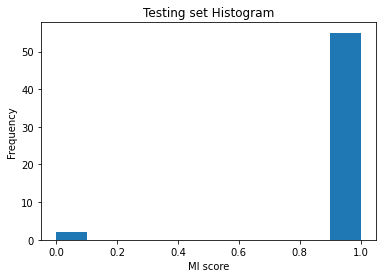

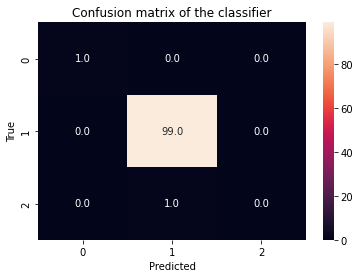

The accuracy of DT is 99.009901%
Participant: 10 
Total samples available: 1344            
Number of training samples: 1242 
Number of testing samples: 101 



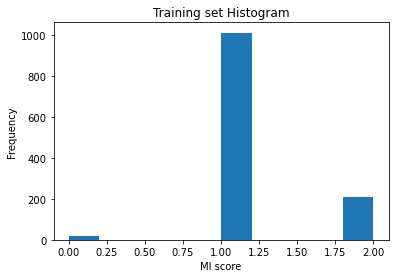

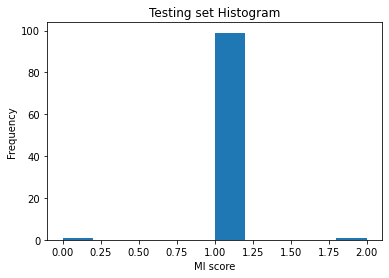

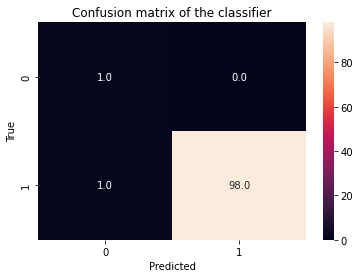

The accuracy of DT is 99.000000%
Participant: 11 
Total samples available: 1344            
Number of training samples: 1243 
Number of testing samples: 100 



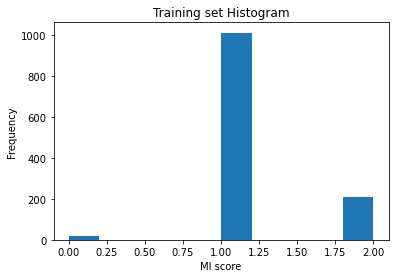

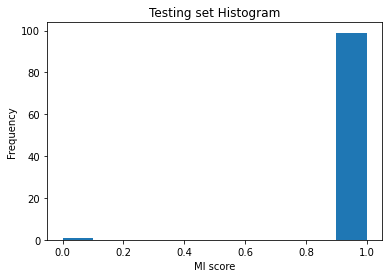

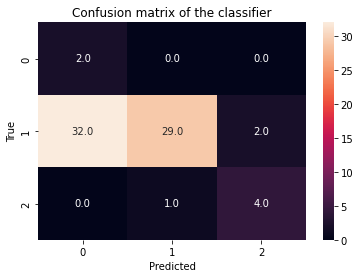

The accuracy of DT is 50.000000%
Participant: 12 
Total samples available: 1344            
Number of training samples: 1273 
Number of testing samples: 70 



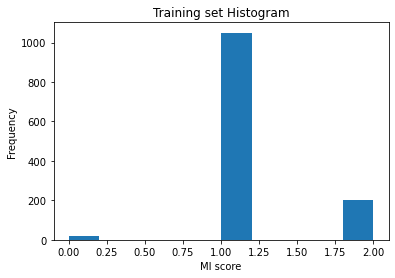

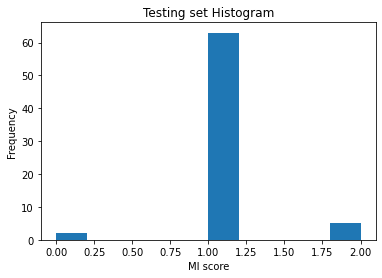

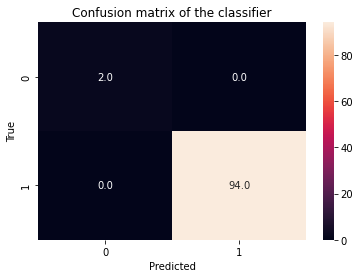

The accuracy of DT is 100.000000%
Participant: 13 
Total samples available: 1344            
Number of training samples: 1247 
Number of testing samples: 96 



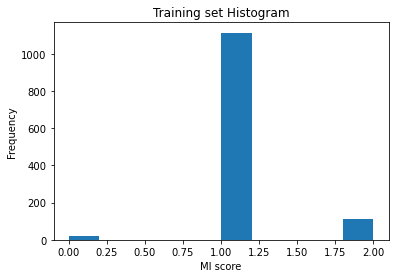

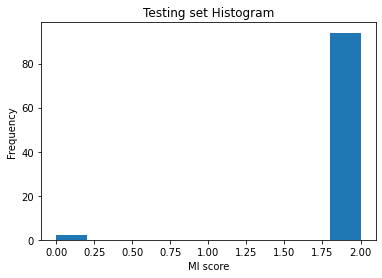

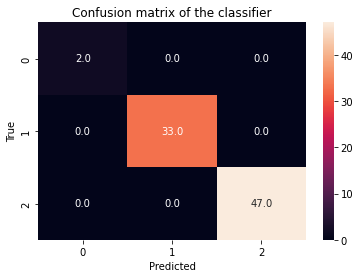

The accuracy of DT is 100.000000%
Participant: 14 
Total samples available: 1344            
Number of training samples: 1261 
Number of testing samples: 82 



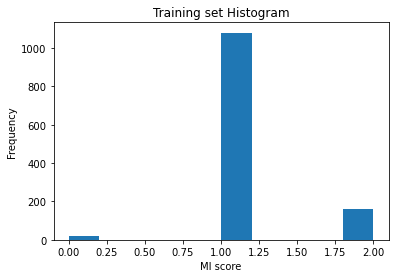

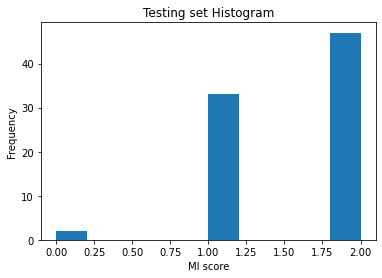

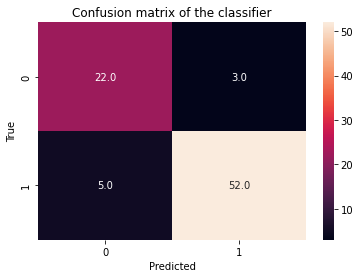

The accuracy of DT is 90.243902%
Participant: 15 
Total samples available: 1344            
Number of training samples: 1262 
Number of testing samples: 82 



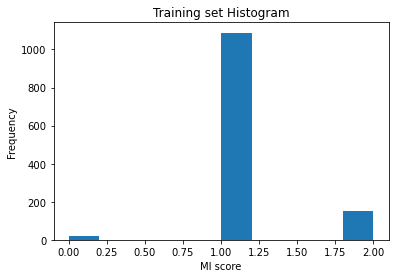

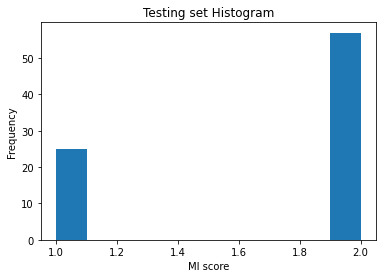

In [46]:
acc = np.zeros (n_participants)

for par_num in range (0, n_participants):

    start_train = n_samples_per_par [par_num]
    end_train = n_samples_per_par [par_num+1]

    X_train = np.vstack ((X[:start_train], X[end_train+1:]))
    y_train = np.hstack ((Y[:start_train], Y[end_train+1:]))

    X_test = X[start_train:end_train]
    y_test = Y[start_train:end_train]

    dt_acc = DT_prediction (X_train, y_train, X_test,y_test)
    histo_labels (par_num+1,ft_stacked,y_train,y_test)
    
    acc[par_num] = dt_acc

In [80]:
print ('Decision Tree: The average LOSO accuracy is %.2f +- %.2f' %(np.mean (acc)*100, np.std (acc)*100))

Decision Tree: The average LOSO accuracy is 54.81 +- 29.84


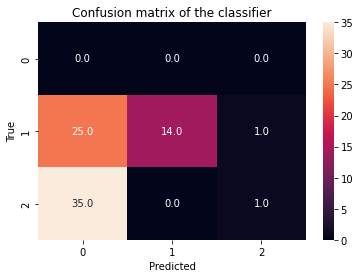

The accuracy of SVM is 19.736842%
Participant: 1 
Total samples available: 1344            
Number of training samples: 1267 
Number of testing samples: 76 



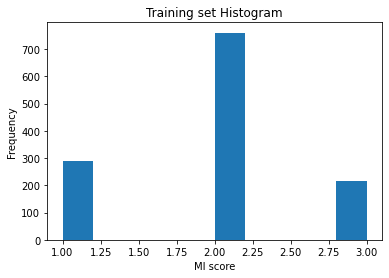

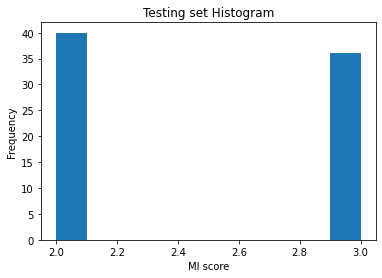

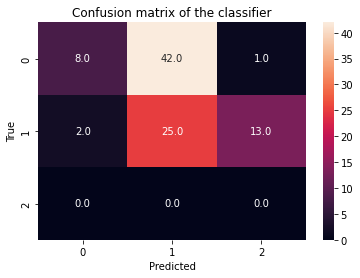

The accuracy of SVM is 36.263736%
Participant: 2 
Total samples available: 1344            
Number of training samples: 1252 
Number of testing samples: 91 



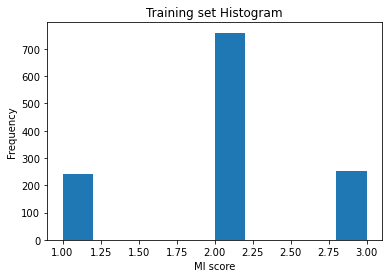

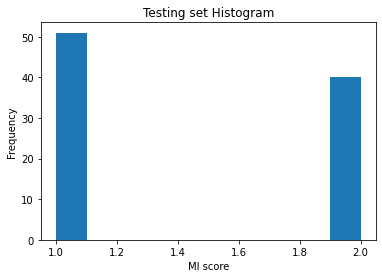

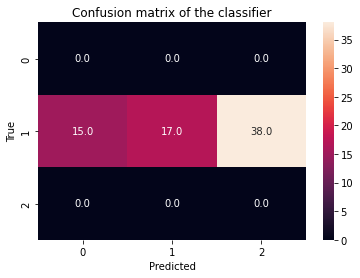

The accuracy of SVM is 24.285714%
Participant: 3 
Total samples available: 1344            
Number of training samples: 1273 
Number of testing samples: 70 



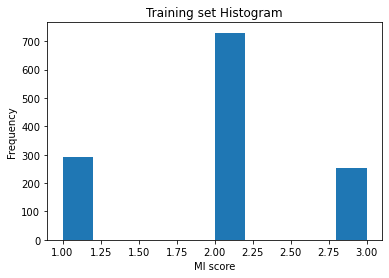

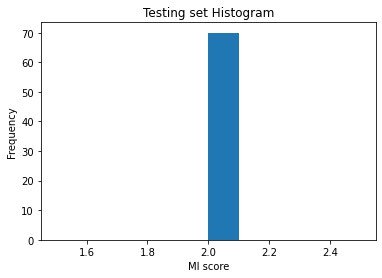

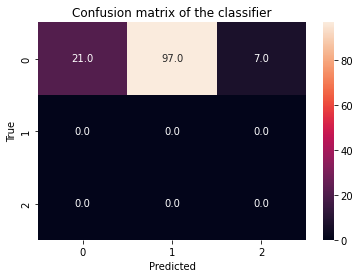

The accuracy of SVM is 16.800000%
Participant: 4 
Total samples available: 1344            
Number of training samples: 1218 
Number of testing samples: 125 



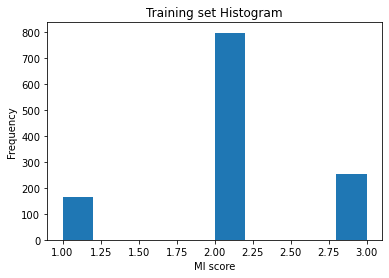

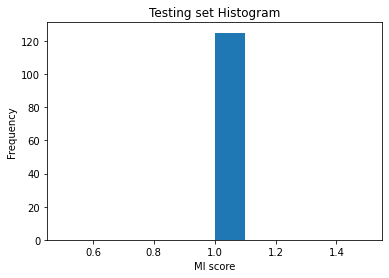

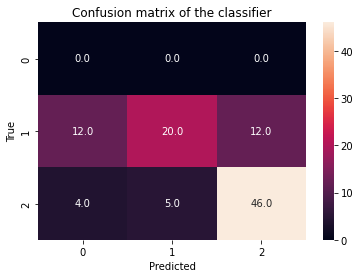

The accuracy of SVM is 66.666667%
Participant: 5 
Total samples available: 1344            
Number of training samples: 1244 
Number of testing samples: 99 



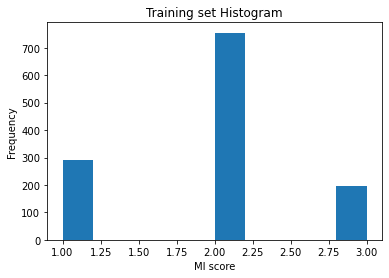

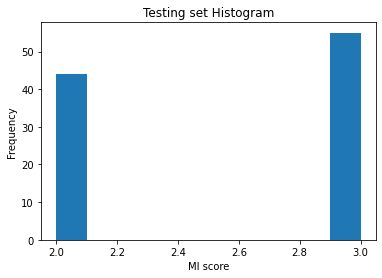

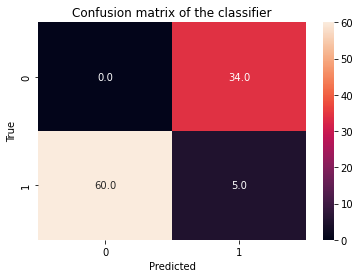

The accuracy of SVM is 5.050505%
Participant: 6 
Total samples available: 1344            
Number of training samples: 1244 
Number of testing samples: 99 



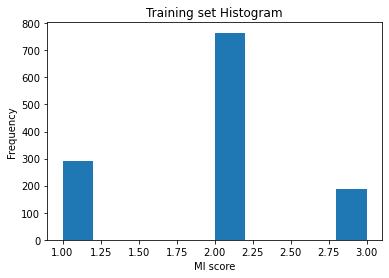

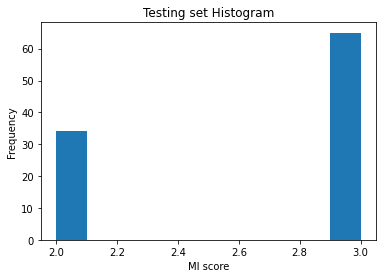

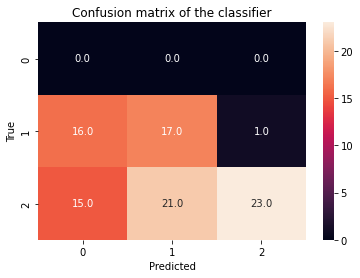

The accuracy of SVM is 43.010753%
Participant: 7 
Total samples available: 1344            
Number of training samples: 1250 
Number of testing samples: 93 



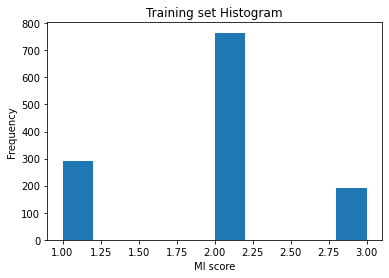

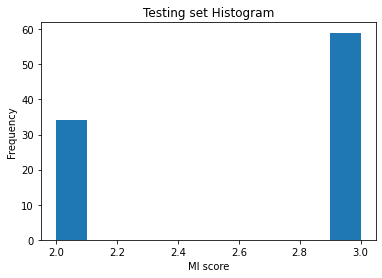

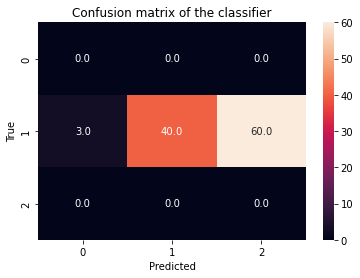

The accuracy of SVM is 38.834951%
Participant: 8 
Total samples available: 1344            
Number of training samples: 1240 
Number of testing samples: 103 



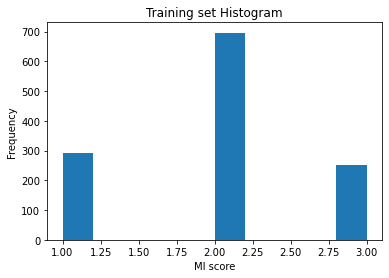

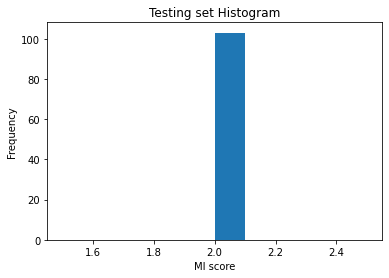

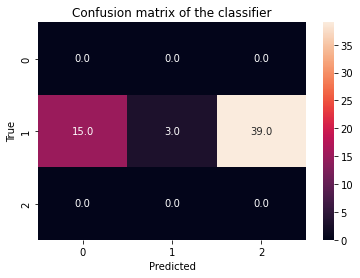

The accuracy of SVM is 5.263158%
Participant: 9 
Total samples available: 1344            
Number of training samples: 1286 
Number of testing samples: 57 



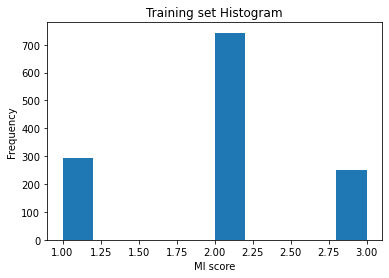

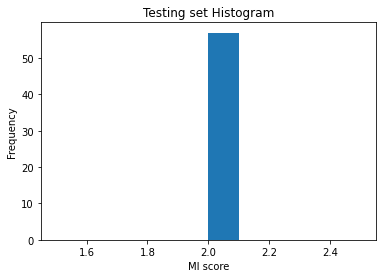

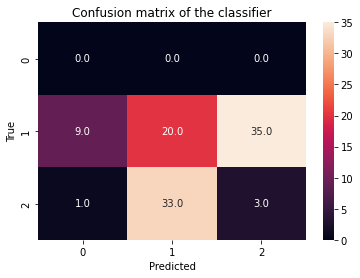

The accuracy of SVM is 22.772277%
Participant: 10 
Total samples available: 1344            
Number of training samples: 1242 
Number of testing samples: 101 



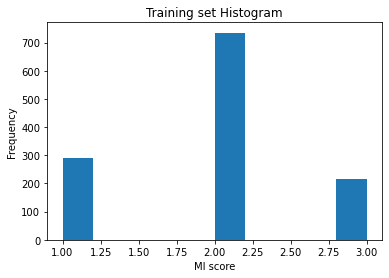

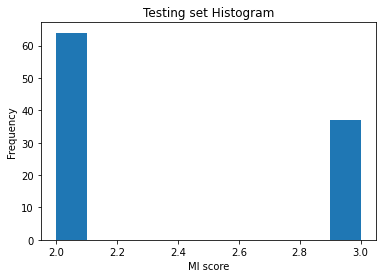

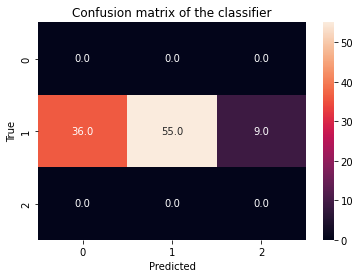

The accuracy of SVM is 55.000000%
Participant: 11 
Total samples available: 1344            
Number of training samples: 1243 
Number of testing samples: 100 



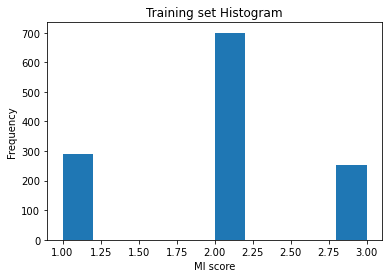

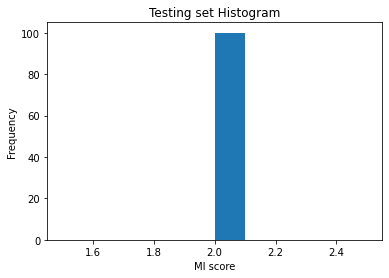

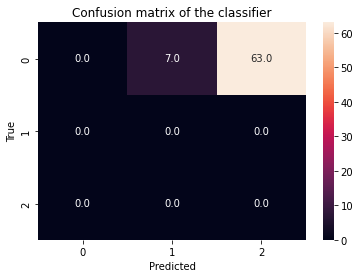

The accuracy of SVM is 0.000000%
Participant: 12 
Total samples available: 1344            
Number of training samples: 1273 
Number of testing samples: 70 



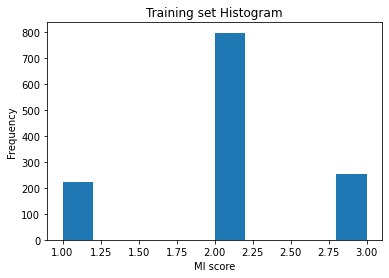

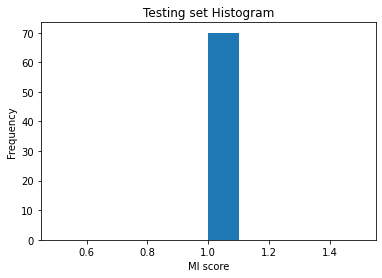

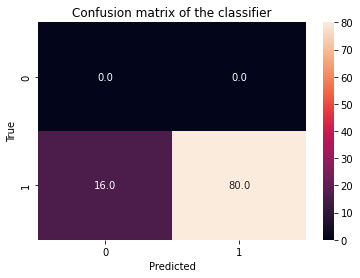

The accuracy of SVM is 83.333333%
Participant: 13 
Total samples available: 1344            
Number of training samples: 1247 
Number of testing samples: 96 



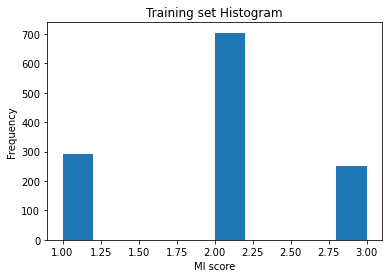

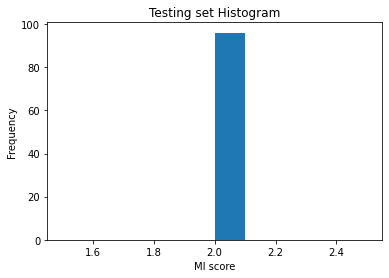

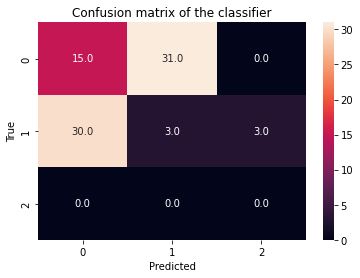

The accuracy of SVM is 21.951220%
Participant: 14 
Total samples available: 1344            
Number of training samples: 1261 
Number of testing samples: 82 



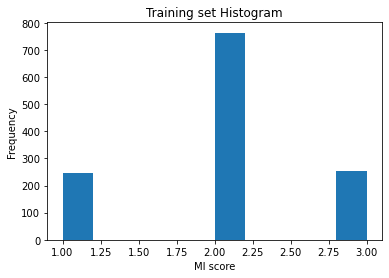

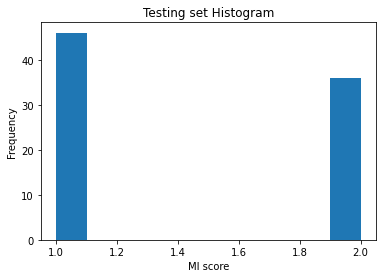

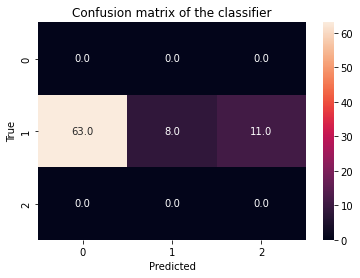

The accuracy of SVM is 9.756098%
Participant: 15 
Total samples available: 1344            
Number of training samples: 1262 
Number of testing samples: 82 



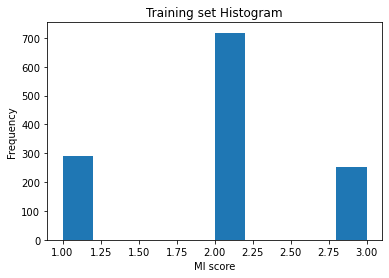

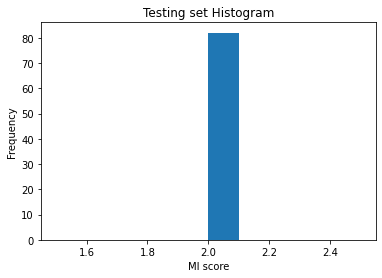

In [81]:
acc = np.zeros (n_participants)

for par_num in range (0, n_participants):

    start_train = n_samples_per_par [par_num]
    end_train = n_samples_per_par [par_num+1]

    X_train = np.vstack ((X[:start_train], X[end_train+1:]))
    y_train = np.hstack ((Y[:start_train], Y[end_train+1:]))

    X_test = X[start_train:end_train]
    y_test = Y[start_train:end_train]

    svm_acc = SVM_prediction (X_train, y_train, X_test,y_test)
    histo_labels (par_num+1,ft_stacked,y_train,y_test)
    
    acc[par_num] = svm_acc

In [82]:
print ('SVM: The average LOSO accuracy is %.2f +- %.2f' %(np.mean (acc)*100, np.std (acc)*100))

SVM: The average LOSO accuracy is 29.92 +- 23.20


# Weighted testing

# SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, Y)

In [48]:
# define model
from sklearn.model_selection import RepeatedStratifiedKFold
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=60)

clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.9890219560878244


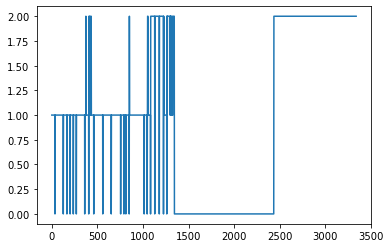

In [50]:
plt.plot (y)
